<a href="https://colab.research.google.com/github/rn0x7f/Machine-Learning/blob/main/Regresi%C3%B3nLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal
Una vez que ya hemos hecho el procesamiento de datos inicial a nuestro dataset ya podemos comenzar a desarrollar nuestro modelo.  
Este ejemplo tratará del modelo de regresión lineal, esta una breve descripción de qué es y como funciona este modelo:  
El modelo de regresión lineal consiste en graficar todas nuestras características y etiquetas, de tal forma que tengamos una distribución de puntos con nuestras características (variables independientes en el eje $x$) y nuestras etiquetas (variables dependientes en el eje $y$) para posteriormente graficar una línea, plano o hiperplano que se ajuste a los puntos de nuestra serie de ejemplos(dataset). La "línea" es nuestro modelo que nos permitirá predecir valores **continuos**.

Consiste en una ecuación de la forma $y=mx+b$, descrita en Machine Learning como: $$y'=w_{i}x_{i}+b$$
* $w_{i}$ - los pesos  
* $x_{i}$ - las características  
* $b$ - el bias  
* $y'$ - nuestro valor a predecir o inferencia.  

La "línea" deberá ajustarse de la mejor forma posible buscando la combinación de pesos y bias adecuados para buscar disminuír la **pérdida**, la cuál se define como la diferencia entre el valor original y el valor predicho. La función de pérdida comúnmente utilizada es MSE(Mean Squared Error) o error cuadrado medio:  
$$\frac{1}{||D||}\cdot\sum_{(x,y)\in D}(y-y')^{2}$$
* $D$ - Dataset.  
* $||D||$ - Cardinalidad, cantidad de objetos en el conjunto.  
* $(x,y)\in D$ - Cada "coordenada" de puntos $x/y$ en el Dataset.  
* y - El valor real de la etiqueta
* y' - El valor predicho por el modelo de regresión, también puede expresarse como $f(x)$ siendo $f$ nuestro modelo de regresión.

La cuál consiste en sumar los cuadrados de la pérdida de cada punto y dividirla entre la cantidad de puntos, para obtener así un valor de pérdida el cual se buscará disminuir lo más posible.  La razón de elevar la pérdida al cuadrado es para eliminar los números negativos y hacer más notorias las pérdidas grandes.  
Además, como RME penaliza más las pérdidas elevadas, puede llegar a ser confuso saber que tan "bueno" es nuestro margen de error con la pérdida, una buena solución para esto (además de sus otras ventajas) es calcular la Raíz Cuadrada del MSE, también conocido como RMSE (Root Mean Squared Error), que nos permite observar la pérdida en una forma más amigable para sacar mejores conclusiones.

# Revisar Correlaciones de la etiqueta
Retomando el último punto de los datos que procesamos, obtuvimos lo siguiente, donde observamos que lo que más afecta al precio de las casas es la cantidad de ingresos y la cercanía al oceano:  

In [20]:
dataset_na.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

Podríamos empezar por graficar la relación entre el precio de la casa y los ingresos

<Axes: xlabel='median_house_value', ylabel='median_income'>

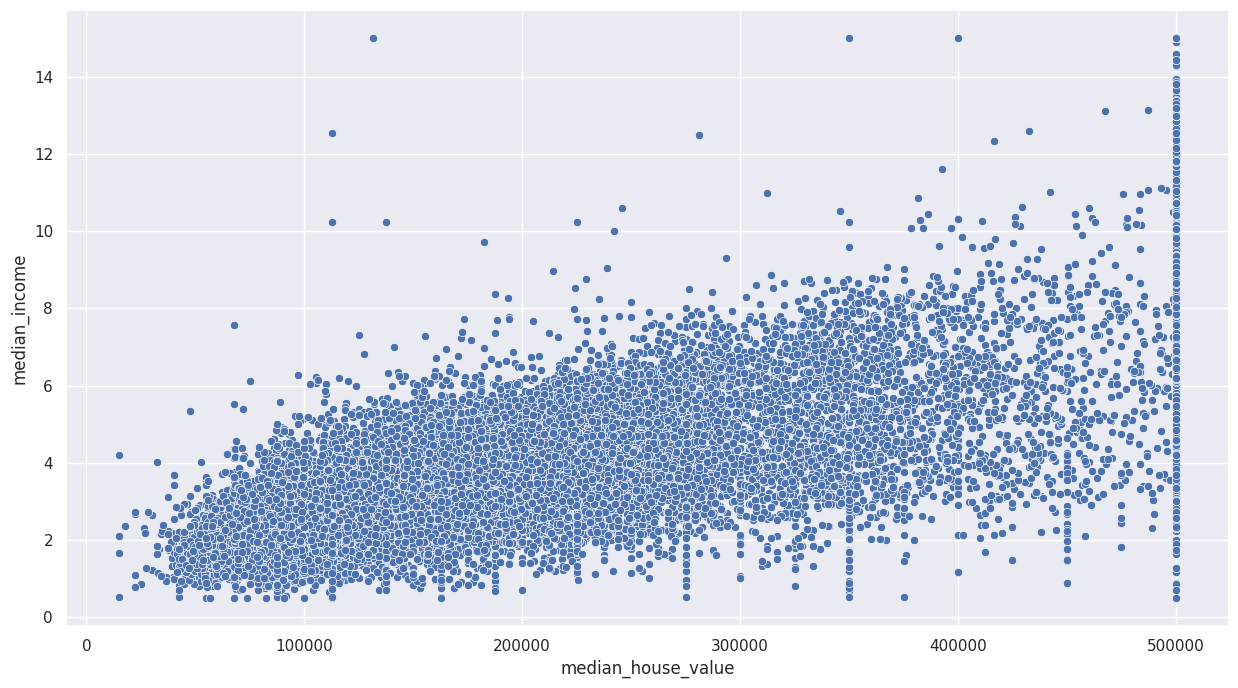

In [21]:
sns.scatterplot(x=dataset_na["median_house_value"], y=dataset_na["median_income"])

Aquí parecería que podríamos tener un buen resultado con el modelo de regresión, pero podemos ver al final como se amontonan, esto sucede porque el límite del precio para las casas está establecido en $500,000$, lo que significa que cualquier otra casa con un precio mayor también está establecida en $500,000$, esto afectaría negativamente a nuestro modelo, así que debemos buscar otra solución.  


# Inventar nuevas características
Podemos tomar en cuenta también que dependiendo de nuestros datos, podemos crear nuevas características basadas en las que ya tenemos, buscando aquellas que de alguna manera ya afectan positivamente nuestra etiqueta. Por ejemplo, podemos calcular la proporción de cuántas habitaciones en la casa son para dormir dividiendo el número de dormitorios entre el total de habitaciones. Esta es una práctica común en machine learning porque puede proporcionar información adicional sobre cómo se distribuye el espacio en la casa:  

In [22]:
dataset_na["bedroom_ratio"] = dataset_na["total_bedrooms"] / dataset_na["total_rooms"]

<Axes: >

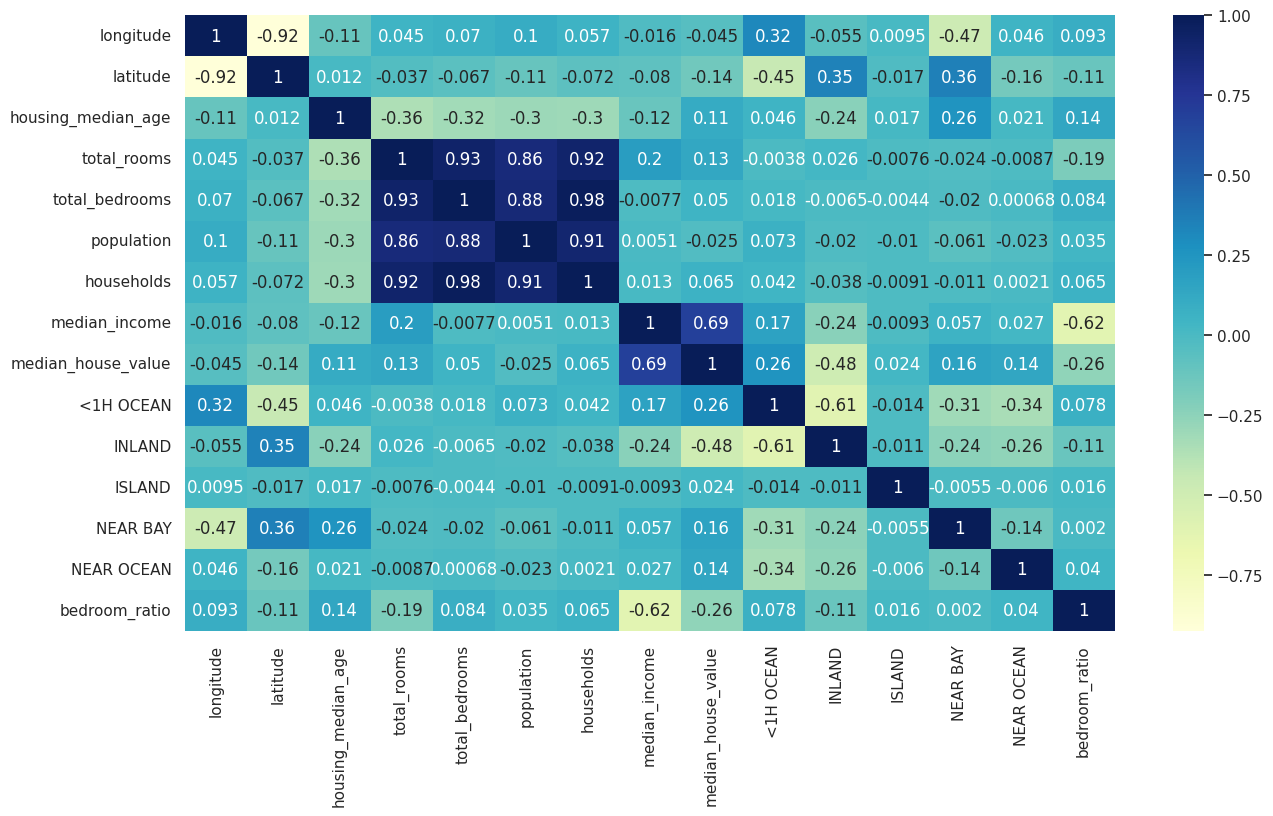

In [23]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(dataset_na.corr(),annot=True, cmap="YlGnBu")

Ahora obtuvimos una característica que tiene más impacto que las dos utilizadas, con un total de $-0.26$, viendo como entre más aumentan las habitaciones para dormir con respecto a las habitaciones totales, más disminuye el precio de la casa, cosa que podría deberse a que las habitaciones que no son para dormir pueden ser más espaciosas y pueden ser para entretenimiento, etc.  

# Separar características de la etiqueta
Ahora sí, para empezar el entrenamiento del modelo necesitamos separar nuestras características y etiquetas en el eje $x$ y el eje $y$ respectivamente, es tan simple como hacer lo siguiente:  

In [24]:
x = dataset_na.drop(["median_house_value"], axis=1)
y = dataset_na["median_house_value"]

# Separar en un conjunto de entrenamiento y conjunto de pruebas
Lo ideal es separar nuestro dataset en al menos dos subconjuntos, uno para entrenar el modelo y otro para hacer pruebas con el modelo entrenado, para asegurarnos así que no hubo overfitting, osea, que el modelo no solo memorizó las respuestas de conjunto de entrenamiento y es capaz de generalizar dicho "conocimiento" para hacer predicciones más precisas en datos nuevos.  
Para separar nuestro dataset de esta manera podemos simplemente utilizar la función `train_test_split` de **sklearn**, especificando el porcentaje de cuánto queremos separar para nuestro conjunto de pruebas, en el siguiente ejemplo se va a especficar un 20% para pruebas con 0.2. La función nos regresa las características de entrenamiento, carácterísticas de pruebas, etiquetas de entrenamiento y etiquetas de pruebas en ese orden:  

In [25]:
from sklearn.model_selection import train_test_split
x_entrenamiento, x_pruebas, y_entrenamiento, y_pruebas = train_test_split(x, y, test_size=0.2)

Podemos verificar que se ha dividido correctamente viendo el número de registros y de columnas en cada una:  

In [26]:
print("x_entrenamiento = ", x_entrenamiento.shape)
print("y_entrenamiento = ", y_entrenamiento.shape)
print("x_pruebas = ", x_pruebas.shape)
print("y_pruebas = ", y_pruebas.shape)

x_entrenamiento =  (16346, 14)
y_entrenamiento =  (16346,)
x_pruebas =  (4087, 14)
y_pruebas =  (4087,)


# Modelo de regresión lineal
Ahora si podemos poceder a la creación del modelo de regresión lineal.  
Primero vamos a guardar en una variable donde queremos guardar todos los resultados de nuestro modelo con la función del tipo de modelo que vamos a crear, en este caso, con la bibliote **sklearn** vamos a importar la función para crear modelos de regresión lineal:  

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Posteriormente iniciamos el entrenamiento de nuestro modelo con e lmétodo `fit()` pasandole los sets de entrenamiento que establecimos anteriormente:  

In [28]:
model.fit(x_entrenamiento, y_entrenamiento)

LinearRegression()

Una vez que ya tenemos entrenado el módelo simplemente podemos hacer predicciones con el método `predict()` del modelo, podemos pasarle directamente nuesto dataframe con las características que definimos para pruebas, esto nos va a regresar las inferencias en forma de un arreglo que podemos convertir en otro dataframe:  

In [29]:
predicciones = model.predict(x_pruebas)
pd.DataFrame(predicciones).head()

,0
0,405225.677923
1,170326.295958
2,178331.926350
3,125063.912136
4,103564.629552


Podemos utilizar este nuevo dataframe para comparar que tanto se equivocó el modelo con las predicciones y las etiquetas de prueba($y$) que guardamos, para hacer el dataframe más vistoso podemos hacerlo con un diccionario de la siguiente manera:   

In [30]:
comparativa = {"Prediccion": predicciones}
pd.DataFrame(comparativa).head()

,Prediccion
0,405225.677923
1,170326.295958
2,178331.926350
3,125063.912136
4,103564.629552


Así mismo podemos unir ambas etiquetas en un solo dataframe para tener una comparación más directa:  

In [31]:
comparativa = {"Prediccion": predicciones, "Valor real": y_pruebas}
pd.DataFrame(comparativa)

,Prediccion,Valor real
126,405225.677923,295200.0
14763,170326.295958,87500.0
166,178331.926350,171400.0
15594,125063.912136,58800.0
10006,103564.629552,187200.0
...,...,...
7227,162621.454081,158900.0
16448,107340.395572,86900.0
17479,175348.760225,325000.0
18120,285918.543507,244500.0


Podemos ver como tenemos algunos valores que se acercan bastante y otros que les falta bastante, lo importante ahora es ver que tan preciso fue nuestro modelo con nuestro set de entrenamiento y nuestro set de pruebas, para comprobar que no hubo overfitting(sobreajuste), podemos hacerlo con el método `score()`:  

In [33]:
print(model.score(x_entrenamiento, y_entrenamiento))
print(model.score(x_pruebas, y_pruebas))

0.6528275424360755
0.6487794225364252


En este caso nos fue bastante bien, podemos ver como se generalizó el "conocimiento" con los datos que no habia visto y obtuvimos una puntuación muy similaren ambos casos, así que no hubo overfitting.  

Ahora vamos a ver de cuanto es la pérdida; la diferencia entre el los valores predichos y los valores reales, para eso podemos usar la función de **sklearn** `mean_squared_error`:

In [35]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pruebas, predicciones)
mse

4639482662.628543

Esto al elevarse al cuadrado, como se explica en el inicio de esta libreta, obtenemos un valor nada amigable, así que podemos obtener el RMSE en su lugar, simplemente sacando la raiz cuadrada con **numpy**:  

In [36]:
import numpy as np
rmse = np.sqrt(mse)
rmse

68113.7479707918

Este número es el que vamos a buscar que siempre sea lo más bajo posible, para esto también tenemos muchas cosas más a tomar en cuenta, como podría ser el llamado **scaler**, pues en neustro dataset, es común que tengamos valores en columnas que vayan de $0$ a $5$, y otros que podrían ir de $0$ a $50000$, esto como ya podríamos imaginar, podría causar que se le dé mas importancia a la columna con valores más grandes, para esto, el **scaler** lo que hace es poner todos los números en un rango más pequeño, "comprimiendo" todos los datos para que se encuentren así en un rango similar.  
Para esto vamos a escalar los datos de entrenamiento y de pruebas con `StandardScaler` de sklearn, al utilizar un scaler simplemente lo hacemos con las características, no nos importa que cambie el valor de nuestra etiqueta:  

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_entrenamiento_escalado = scaler.fit_transform(x_entrenamiento)
x_pruebas_escalado = scaler.transform(x_pruebas)

Ahora podríamos utilizar estos nuevos datos para entrenar el modelo, esto no es un paso siempre necesario, hay que tenerlo en cuenta, hay que recordar que los pasos a seguir para el preprocesamiento de los datos depende directamente de nuestro dataset.  